In [7]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import warnings
warnings.filterwarnings('ignore')

import utils
from active_set import ActiveSet

def create_M(size, tile):
    # Create the zero matrix of size 2x4
    zero_block = np.zeros_like(tile)

    # Construct the matrix M
    M = np.zeros(size)

    for i in range(5):
        # Calculate the indices for placing the block
        row_start = i * 2
        row_end = row_start + 2
        col_start = i * 4
        col_end = col_start + 4

        # Place the block in the appropriate position
        M[row_start:row_end, col_start:col_end] = tile

    return M

# Define y and the tildeM matrix
y = np.array([1, -2, 3, -4, 5, -5, 4, -3, 2, -1])
tildeM = np.array([[1, 1, 0, 0], [0, 0, 1, 1]])

# Create matrix M
M = create_M((10, 20), tildeM)
print(M)

# Define the problems
problems = [
    # the first five problems
    {"m": 1, "n": 2,  "M": np.array([[1, 2]]), "y": np.array([3]),
     "start": [utils.rnd_vec_l1_norm(2) for _ in range(3)]},
    
    {"m": 2, "n": 4,  "M": np.array([[1, 2, 3, 4], [5, 6, 7, 8]]), "y": np.array([15, 20]),
     "start": [utils.rnd_vec_l1_norm(4) for _ in range(3)]},
    
    {"m": 3, "n": 6, "M": M[:3,:6], "y": y[:3],
     "start": [utils.rnd_vec_l1_norm(6) for _ in range(3)]},
    
    {"m": 4, "n": 8, "M": M[:4,:8], "y": y[:4],
     "start": [utils.rnd_vec_l1_norm(8) for _ in range(3)]},
    
    {"m": 5, "n": 10, "M": M[:5,:10], "y": y[:5],
     "start": [utils.rnd_vec_l1_norm(10) for _ in range(3)]},

    # the last problem
    {"m": 10, "n": 20, "M": M, "y": y,
     "start": [utils.rnd_vec_l1_norm(20) for _ in range(5)]},
]

[[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]]


In [8]:
active_set = ActiveSet()

for p in problems:
    print()
    print("=%"*50)
    print("%="*50)
    print()
    print(p)
    print()
    G, c, A, b = utils.transform_problem_to_qp_form(p["M"], p["y"])

    for x0 in p["start"]:
        x0 = np.concatenate((x0, abs(x0)))

        start = time.time()
        results = active_set.run(G=G, c=c, A=A, b=b, x0=x0, neq=0, nineq=A.shape[0])
        end = time.time()

        print("_"*30)
        print()
        print(f"Starting point")
        print(np.around(x0[:p['n']], 10))
        print()
        print("A solution x is")
        print(np.around(results[0], 10)[:p["n"]])
        print()
        print(f"The optimal value is {np.around(results[1], 10)}, it took iterations {results[2]}, The running time {round(end - start, 10)}")

    print()
    print("="*50)
    print()
    x0 = np.zeros(p["n"])
    ux = minimize(utils.objective_function, x0, args=(p["M"], p["y"]))
    print("The unconstrained solution x is:")
    print(np.around(ux.x, 5)[:p["n"]])


=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%
%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=

{'m': 1, 'n': 2, 'M': array([[1, 2]]), 'y': array([3]), 'start': [array([0.69233035, 0.12366672]), array([-0.30680199,  0.45122076]), array([0.66422548, 0.09458046])]}

______________________________

Starting point
[0.69233035 0.12366672]

A solution x is
[-0.  1.]

The optimal value is -4.0, it took iterations 2, The running time 0.0025629997
______________________________

Starting point
[-0.30680199  0.45122076]

A solution x is
[-0.  1.]

The optimal value is -4.0, it took iterations 2, The running time 0.0018379688
______________________________

Starting point
[0.66422548 0.09458046]

A solution x is
[-0.  1.]

The optimal value is -4.0, it took iterations 2, The running time 0.0012307167


The unconstrained solution x is:
[0.6 1.2]

=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=%=

/tmp/ipykernel_125501/984787838.py:30: UserWarning: No contour levels were found within the data range.
  plt.contour(X1, X2, Z, levels=[0], colors='black', linestyles='dashed')


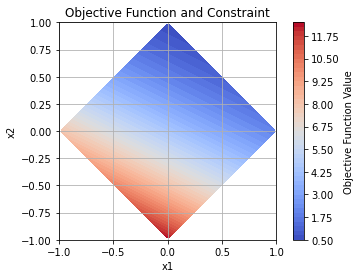

In [72]:
# Given matrix M and vector y
M = problems[0]["M"]
y = problems[0]["y"]

# Define objective function f(x)
def objective_function(x):
    return 0.5 * np.linalg.norm(np.dot(M, x) - y)**2

# Define constraint function
def constraint(x):
    return np.sum(np.abs(x)) - 1

# Generate grid points for x1 and x2
x1 = np.linspace(-1, 1, 100)
x2 = np.linspace(-1, 1, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = np.zeros_like(X1)

# Calculate objective function values and constraint values for each grid point
for i in range(len(x1)):
    for j in range(len(x2)):
        x = np.array([X1[i,j], X2[i,j]])
        Z[i,j] = objective_function(x)
        if constraint(x) > 0:
            Z[i,j] = np.nan

# Plot the contour of the objective function and the feasible region
plt.contourf(X1, X2, Z, levels=50, cmap='coolwarm')
plt.colorbar(label='Objective Function Value')
plt.contour(X1, X2, Z, levels=[0], colors='black', linestyles='dashed')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Objective Function and Constraint')
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.gca().set_aspect('equal')
plt.grid(True)
plt.show()
